In [5]:
import os
import numpy as np
import pandas as pd
import cv2
import math
import random

import matplotlib
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt



%matplotlib inline
%config InlineBackend.figure_format='retina'

from config import *
from utils import get_dir_of_obj

## To Print multiple lines without "print" or "display" comand but plots won't show
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"


Dataset

In [6]:
def dataframe_from_file(file_path):
    """
    Creates pandas dataframe from YOLOv8 dataset format
    """
    path2file = os.path.join(file_path, 'labels')
    df = pd.DataFrame()
    file_list = []
    col_names=['class', 'x', 'y', 'w', 'h','img_name']

    for file in os.listdir(path2file):
        if file[-4:] == '.txt':
            file_list.append(file)

    for file_name in file_list:
        with open(os.path.join(path2file, file_name), encoding='utf-8') as txt:
            for row in txt:
                row = row[:-1]  # Remove \n
                row = row.split(" ")
                row = [x if x != '' else None for x in row]
                # print(row)
                new_df = pd.concat([pd.DataFrame([row],dtype='float'),pd.DataFrame([file_name[:-4]])],axis=1)  # Concat labels and file name
                df = pd.concat([df, new_df], axis=0)  # Append new rows

    df.columns = col_names
    return df

In [7]:
df_train = dataframe_from_file(TRAIN_PATH)
# df_val = dataframe_from_file(VAL_PATH)
# df_test = dataframe_from_file(TEST_PATH)


In [8]:
print(df_train.shape)
df_train.head()


(32061, 6)


,class,x,y,w,h,img_name
0,5.0,0.092188,0.214844,0.183984,0.135937,0000a16e4b057580_jpg.rf.00ab48988370f64f5ca8ea...
0,5.0,0.092188,0.111719,0.128516,0.173437,0000a16e4b057580_jpg.rf.00ab48988370f64f5ca8ea...
0,5.0,0.345313,0.127344,0.131250,0.113672,0000a16e4b057580_jpg.rf.00ab48988370f64f5ca8ea...
0,5.0,0.635938,0.138281,0.166406,0.179297,0000a16e4b057580_jpg.rf.00ab48988370f64f5ca8ea...
0,5.0,0.745313,0.498437,0.352344,0.471875,0000a16e4b057580_jpg.rf.00ab48988370f64f5ca8ea...


Info

In [9]:
unq_values = df_train["img_name"].unique()
print("Total Records: ", len(df_train))
print("Unique Images: ",len(unq_values))

# path2imgs = os.path.join(TRAIN_PATH, 'images')
# unique_sizes = set()
# for file in os.listdir(path2imgs):
#     if file[-4:] == '.jpg':
#         img_path = os.path.join(path2imgs, file)
#         unique_sizes.add(cv2.imread(img_path).shape)
# print("Image shapes:", unique_sizes)


null_values = df_train.isna().sum(axis = 0)
print("\n> NaN Values in each column <")
print(null_values)

classes = df_train["class"].unique()
print("Total Classes: ",len(classes))
print("\n> Classes <\n",CLS_MAP_DICT)


Total Records:  32061
Unique Images:  7108


NameError: name 'unique_sizes' is not defined

In [10]:
df_train = df_train.dropna()
null_values = df_train.isna().sum(axis = 0)
print("\n> NaN Values in each column <")
print(null_values)
unq_values = df_train["img_name"].unique()
print("Total Records: ", len(df_train))
print("Unique Images: ",len(unq_values))


> NaN Values in each column <
class       0
x           0
y           0
w           0
h           0
img_name    0
dtype: int64
Total Records:  31863
Unique Images:  6915


(array([ 6027.,     0.,  2941.,     0.,  6011.,     0., 13871.,     0.,
         1353.,  1660.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

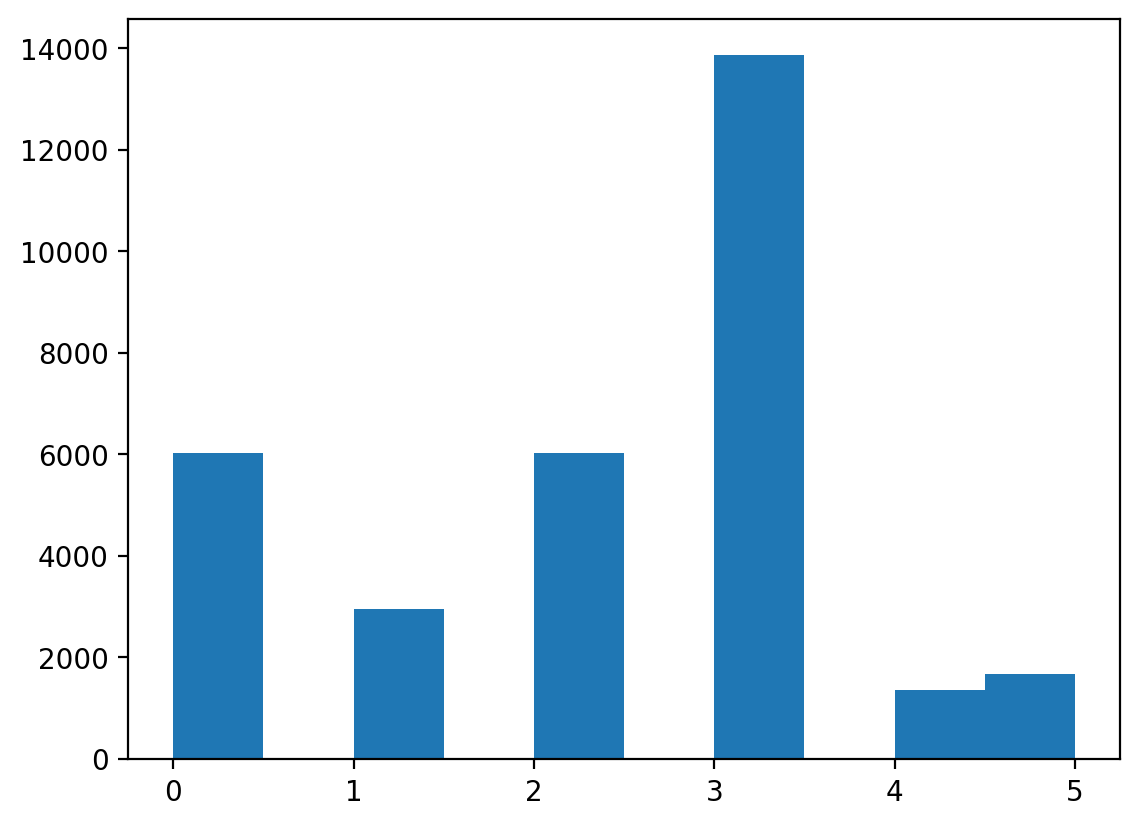

In [11]:
plt.hist(df_train['class'])
# plt.hist(df_val['class'])
# plt.hist(df_test['class'])

Visualize Random Images with BBox

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


76271a84ca179b98_jpg.rf.4ae7e5394080aa7aae0c5eccb5a1a44f


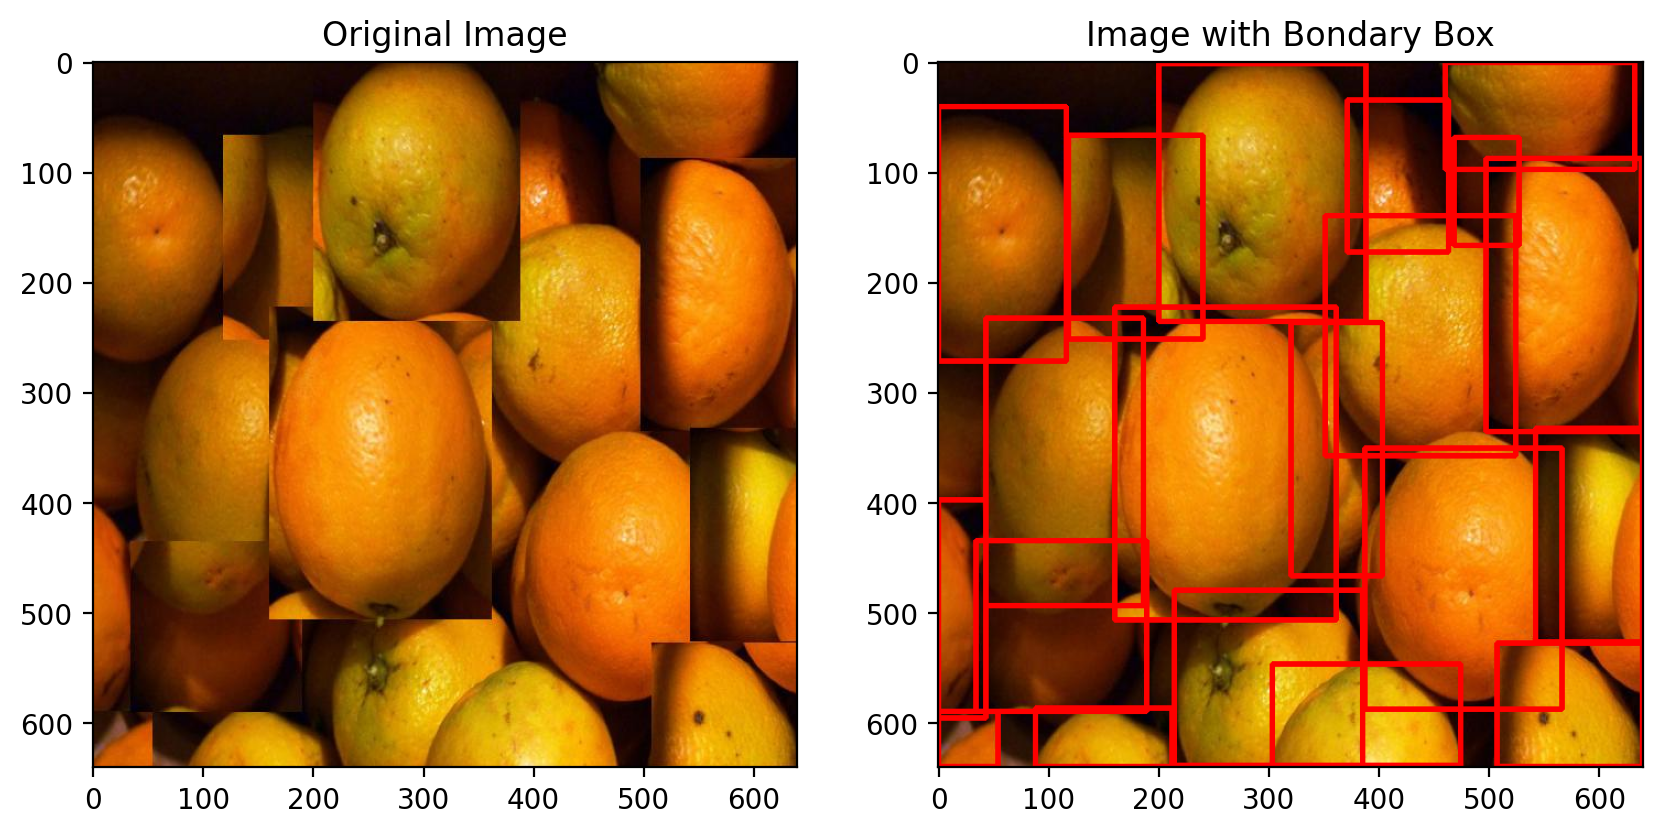

In [12]:

def plot_random_img():
    
    

    fig, ax = plt.subplots(1, 2, figsize = (10, 10))
    ax = ax.flatten()
    
    image_name = df_train.iloc[random.randint(0, df_train.shape[0])]['img_name']
    print(image_name)
    records = df_train[df_train['img_name'] == image_name]
    img_path = os.path.join(TRAIN_PATH, "images", image_name + ".jpg")

    # Reading and converting image to float range [0, 1]
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB).astype(np.float32)
    image /= 255.0
    image_bbox = image

    ax[0].set_title('Original Image')
    ax[0].imshow(image)
    
    for idx, row in records.iterrows():
        box = row[['x', 'y', 'w', 'h']].values * 640
        x = int(box[0])
        y = int(box[1])
        w = int(box[2])
        h = int(box[3])
        cv2.rectangle(image_bbox, (int(x-w/2), int(y-h/2)), (int(x+w/2),int(y+h/2)), (255,0,0), 3)
    
    ax[1].set_title('Image with Bondary Box')
    ax[1].imshow(image_bbox)

    plt.show()

plot_random_img()